In [17]:
from entsoe import EntsoePandasClient
from entsoe.exceptions import NoMatchingDataError
import pandas as pd
from pathlib import Path
import os

Path.cwd()
os.listdir()

api_key = "b45ffb86-fea3-49e7-9c01-9ad6429d3ec9"
client = EntsoePandasClient(api_key=api_key)

start = pd.Timestamp('20190101', tz='Europe/Brussels')
end = pd.Timestamp('20200101', tz='Europe/Brussels')

countries = ['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK']

for country in countries:
    print(f"Trying country {country}.")

    country_code = country
    # generation_country = client.query_generation(country_code, start=start,end=end, psr_type=None)
    try:
        gen = client.query_generation(country, start=start, end=end, psr_type=None)
    except NoMatchingDataError:
        continue
    
    gen.to_csv(Path.cwd() / "generation_data" / f"{country}.csv")

    #generation.append(generation_country)
    #day_ahead_prices_country = client.query_day_ahead_prices(country_code, start, end)

#generation = pd.concat(generation, keys=countries, axis=1)

#client.query_crossborder_flows(country_code_from, country_code_to, start, end)

In [12]:
gen = generation_country

In [23]:
gen.transpose().xs("Actual Consumption", level=1)

2019-01-01 00:00:00+01:00  2019-01-01 00:15:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                     1827.0                     1335.0   

                      2019-01-01 00:30:00+01:00  2019-01-01 00:45:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                     1120.0                     1218.0   

                      2019-01-01 01:00:00+01:00  2019-01-01 01:15:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                      999.0                     1104.0   

                      2019-01-01 01:30:00+01:00  2019-01-01 01:45:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                     1853.0                     2178.0   

                      2019-01-01 02:00:00+01:00  2019-01-01 02:15:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                     2112.0                     2372.0   

                      ...  2019-01-01 21:30:00+01:00  \
Fossil Gas            ...                        1.0   
Hydro Pumped Storage  ...                     1936.0   

                      2019-01-01 21:45:00+01:00  2019-01-01 22:00:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                     2519.0                     1818.0   

                      2019-01-01 22:15:00+01:00  2019-01-01 22:30:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                     1832.0                     1799.0   

                      2019-01-01 22:45:00+01:00  2019-01-01 23:00:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                     2129.0                     2438.0   

                      2019-01-01 23:15:00+01:00  2019-01-01 23:30:00+01:00  \
Fossil Gas                                  1.0                        1.0   
Hydro Pumped Storage                     3601.0                     3590.0   

                      2019-01-01 23:45:00+01:00  
Fossil Gas                                  1.0  
Hydro Pumped Storage                     4294.0  

[2 rows x 96 columns]

In [10]:
import os
from pathlib import Path
import pandas as pd

data_path =Path.cwd() / ".." / ".." / "generation_data"

gen = pd.read_csv(data_path / "DE.csv", parse_dates=True)

C:\Users\s2216495\AppData\Local\Temp\ipykernel_18784\2339226854.py:7: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  gen = pd.read_csv(data_path / "DE.csv", parse_dates=True)


In [68]:
gen = pd.read_csv(data_path / "AT.csv", parse_dates=True, index_col=0).iloc[1:]

Series([], dtype: float64)

In [76]:
gen.columns

Index(['Biomass', 'Biomass.1', 'Fossil Gas', 'Fossil Gas.1',
       'Fossil Hard coal', 'Fossil Hard coal.1', 'Fossil Oil', 'Fossil Oil.1',
       'Geothermal', 'Geothermal.1', 'Hydro Pumped Storage',
       'Hydro Pumped Storage.1', 'Hydro Run-of-river and poundage',
       'Hydro Run-of-river and poundage.1', 'Hydro Water Reservoir',
       'Hydro Water Reservoir.1', 'Other', 'Other.1', 'Other renewable',
       'Other renewable.1', 'Solar', 'Solar.1', 'Waste', 'Waste.1',
       'Wind Onshore', 'Wind Onshore.1'],
      dtype='object')

In [75]:
# "Gas": ["Fossil Coalderived gas", "Fossil Gas"],
gen[["Fossil Coalderived gas", "Fossil Gas"]].astype(float).sum()

KeyError: "['Fossil Coalderived gas'] not in index"

##### Scout datasets available in pypsa-eur and entsoe

In [62]:
import numpy as np
import re
import warnings

warnings.filterwarnings("ignore")


def scout_techs():
    
    techs = set()
    valid_consumption_types = ["Hydro Pumped Storage"]

    def two_columns_analysis(df, all_techs, country_techs, col_types):

        for i, (col, col_type) in enumerate(zip(country_techs, col_types)):
            
            col = re.sub('[^A-Za-z ]+', '', col)
            
            if col_type == "Actual Consumption":

                if not col in valid_consumption_types:
                    continue
                    
                if col in valid_consumption_types:
                    all_techs.add(col + " Charging") 
        
            else:
                all_techs.add(col)
            
        return all_techs
   
    def is_country_generation(filename):
        return filename.endswith(".csv") and len(filename) == 6 

    generation_files = [file for file in os.listdir(data_path) if is_country_generation(file)]

    for i, country in enumerate(generation_files):
        print(f"Gathering techs from {country[:2]}; {i+1}/{len(generation_files)}")
        
        gen = pd.read_csv(data_path / "DE.csv", parse_dates=True, index_col=0) 

        if np.isnan(gen.index[0]):
            col_types = gen.iloc[0].tolist()
            gen = gen.iloc[1:] 
        else:
            col_types = ["Actual Aggregated" for _ in range(gen.shape[1])]

        techs = two_columns_analysis(gen.iloc[1:], techs, gen.columns, col_types)

    return techs 


techs = scout_techs()

Gathering techs from AT; 1/32
Gathering techs from BA; 2/32
Gathering techs from BE; 3/32
Gathering techs from BG; 4/32
Gathering techs from CH; 5/32
Gathering techs from CZ; 6/32
Gathering techs from DE; 7/32
Gathering techs from DK; 8/32
Gathering techs from EE; 9/32
Gathering techs from ES; 10/32
Gathering techs from FI; 11/32
Gathering techs from FR; 12/32
Gathering techs from GB; 13/32
Gathering techs from GR; 14/32
Gathering techs from HR; 15/32
Gathering techs from HU; 16/32
Gathering techs from IE; 17/32
Gathering techs from IT; 18/32
Gathering techs from LT; 19/32
Gathering techs from LU; 20/32
Gathering techs from LV; 21/32
Gathering techs from ME; 22/32
Gathering techs from MK; 23/32
Gathering techs from NL; 24/32
Gathering techs from NO; 25/32
Gathering techs from PL; 26/32
Gathering techs from PT; 27/32
Gathering techs from RO; 28/32
Gathering techs from RS; 29/32
Gathering techs from SE; 30/32
Gathering techs from SI; 31/32
Gathering techs from SK; 32/32


In [67]:
techs

{'Biomass',
 'Fossil Brown coalLignite',
 'Fossil Coalderived gas',
 'Fossil Gas',
 'Fossil Hard coal',
 'Fossil Oil',
 'Geothermal',
 'Hydro Pumped Storage',
 'Hydro Pumped Storage Charging',
 'Hydro Runofriver and poundage',
 'Hydro Water Reservoir',
 'Nuclear',
 'Other',
 'Other renewable',
 'Solar',
 'Waste',
 'Wind Offshore',
 'Wind Onshore'}

In [6]:
import pypsa
from pathlib import Path
import pandas as pd

data_path =Path.cwd() / ".." / ".." / "generation_data"

n = pypsa.Network(data_path / "elec_s_37.nc")

INFO:pypsa.io:Imported network elec_s_37.nc has buses, carriers, generators, lines, links, loads, storage_units


In [7]:
n.generators.carrier.value_counts()

onwind        37
solar         37
ror           29
offwind-ac    28
offwind-dc    23
CCGT          20
coal          20
nuclear       15
lignite       13
oil           12
biomass       11
OCGT          10
Name: carrier, dtype: int64

In [114]:
generation_mapper_entsoe = {
    "Wind Onshore": ["Wind Onshore"],
    "Wind Offshore": ["Wind Offshore"],
    "Solar": ["Solar"],
    "Biomass": ["Waste", "Biomass"],
    "Hydro": ["Hydro Pumped Storage", "Hydro Water Reservoir"],
    "Run of River": ["Hydro Run-of-river and poundage"],
    "Nuclear": ["Nuclear"],
    "Gas": ["Fossil Coal-derived gas", "Fossil Gas"],
    "Oil": ["Fossil Oil"],
    "Lignite": ["Fossil Brown coal/Lignite"],
    "Hard Coal": ["Fossil Hard coal"],
}

generation_mapper_pypsa = {
    "Solar": ["solar"],
    "Wind Onshore": ["onwind"],
    "Wind Offshore": ["offwind"],
    "Biomass": ["biomass"],
    "Hydro": [],
    "Run of River": ["ror"],
    "Nuclear": ["nuclear"],
    "Gas": ["OCGT", "CCGT"],
    "Oil": ["oil"],
    "Lignite": ["lignite"],
    "Hard Coal": ["coal"],
}

In [115]:
import json 

with open(data_path / "generation_mapper_entsoe.json", "w") as f:
    json.dump(generation_mapper_entsoe, f)

with open(data_path / "generation_mapper_pypsa.json", "w") as f:
    json.dump(generation_mapper_pypsa, f)

##### Harmonize Data

{'Biomass': ['Waste', 'Biomass'],
 'Gas': ['Fossil Coal-derived gas', 'Fossil Gas'],
 'Hard Coal': ['Fossil Hard coal'],
 'Hydro': ['Hydro Pumped Storage', 'Hydro Water Reservoir'],
 'Lignite': ['Fossil Brown coal/Lignite'],
 'Nuclear': ['Nuclear'],
 'Oil': ['Fossil Oil'],
 'Run of River': ['Hydro Run-of-river and poundage'],
 'Solar': ['Solar'],
 'Wind Offshore': ['Wind Offshore'],
 'Wind Onshore': ['Wind Onshore']}
Gathering techs from AT; 1/32


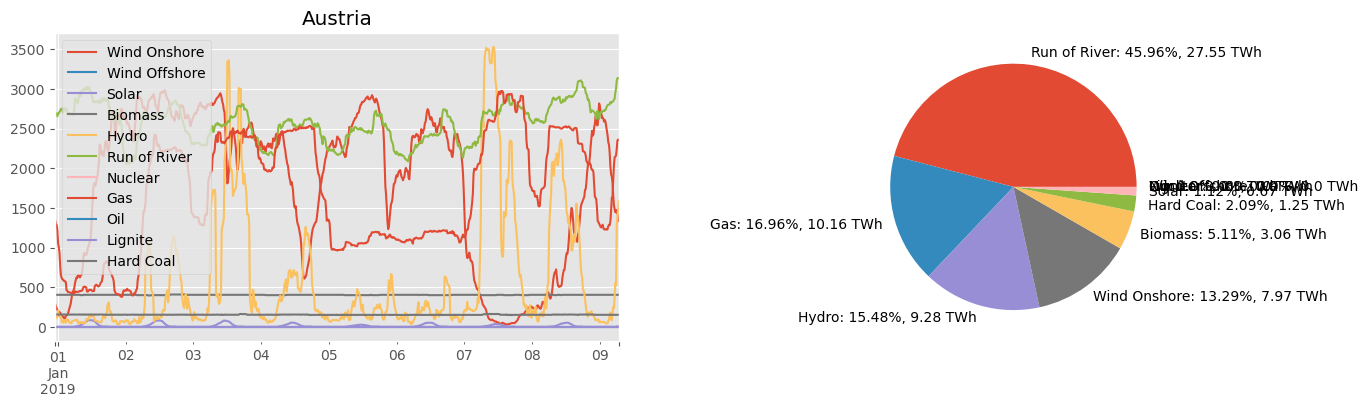

Gathering techs from BA; 2/32


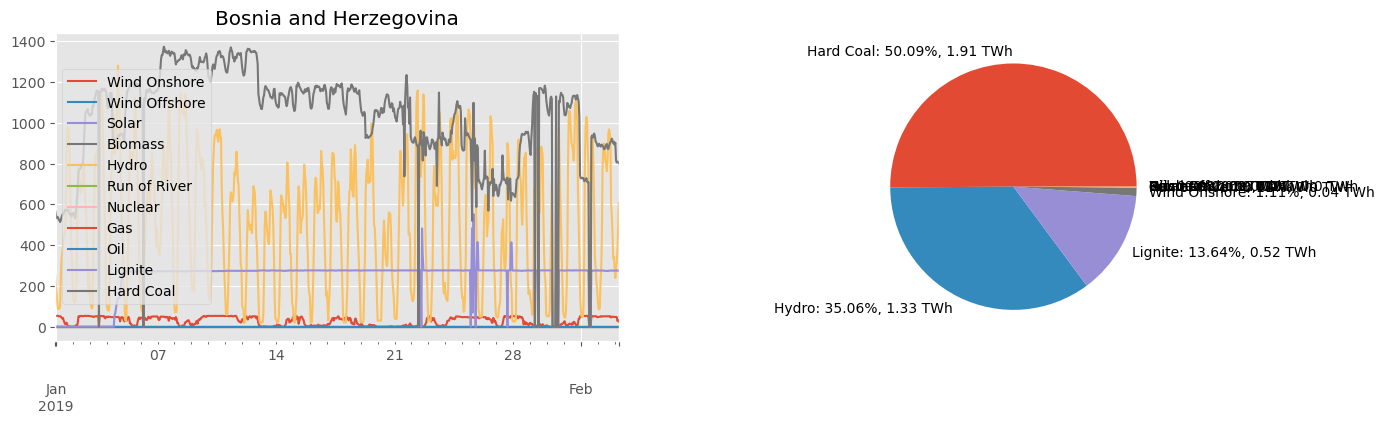

Gathering techs from BE; 3/32


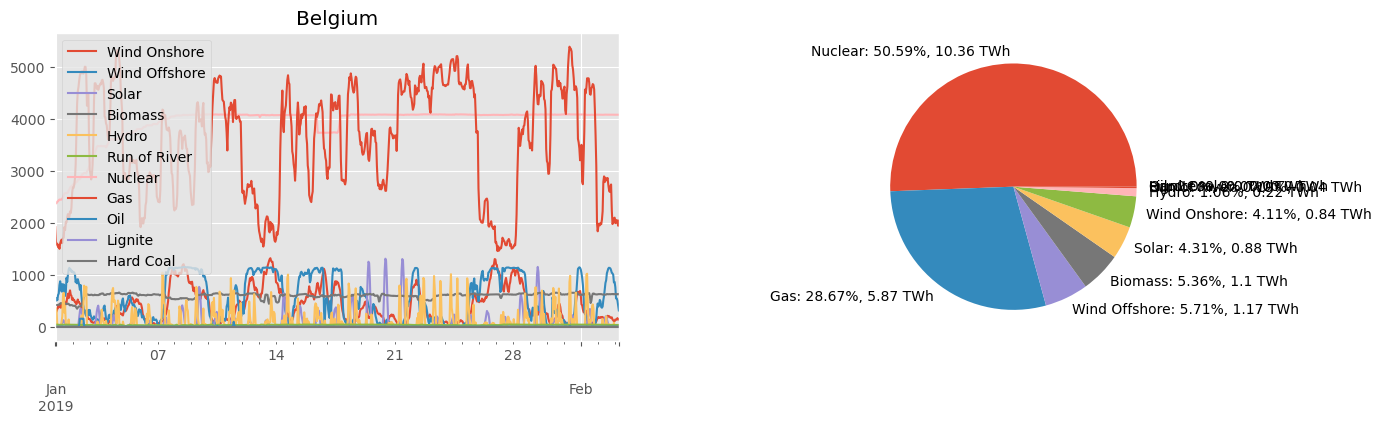

Gathering techs from BG; 4/32


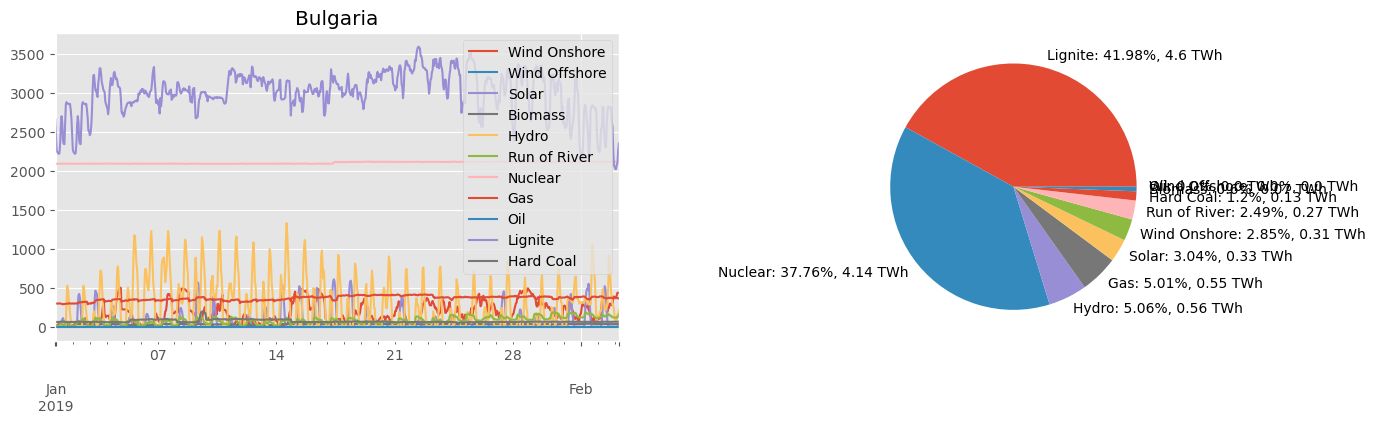

Gathering techs from CH; 5/32


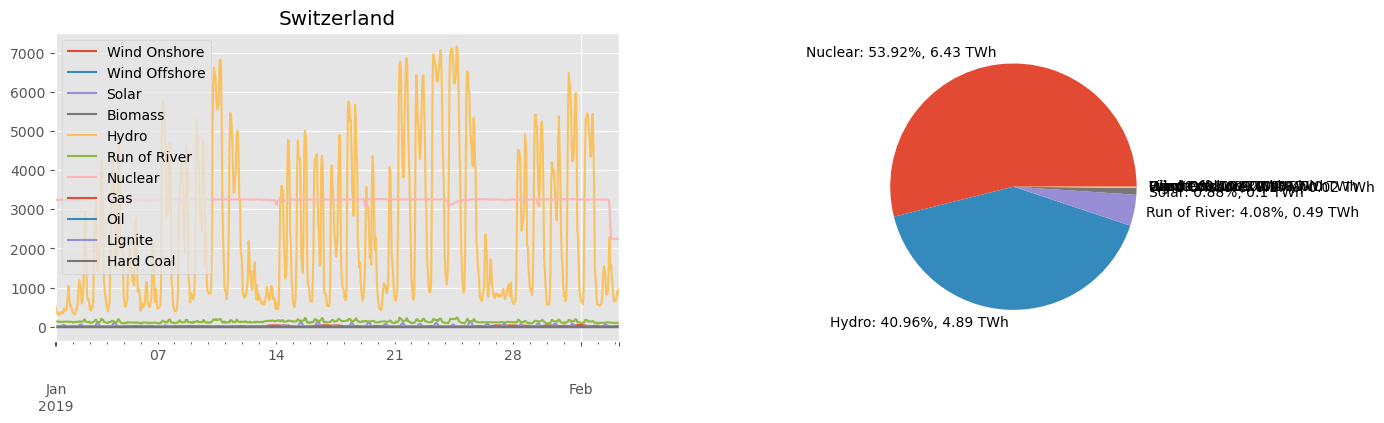

Gathering techs from CZ; 6/32


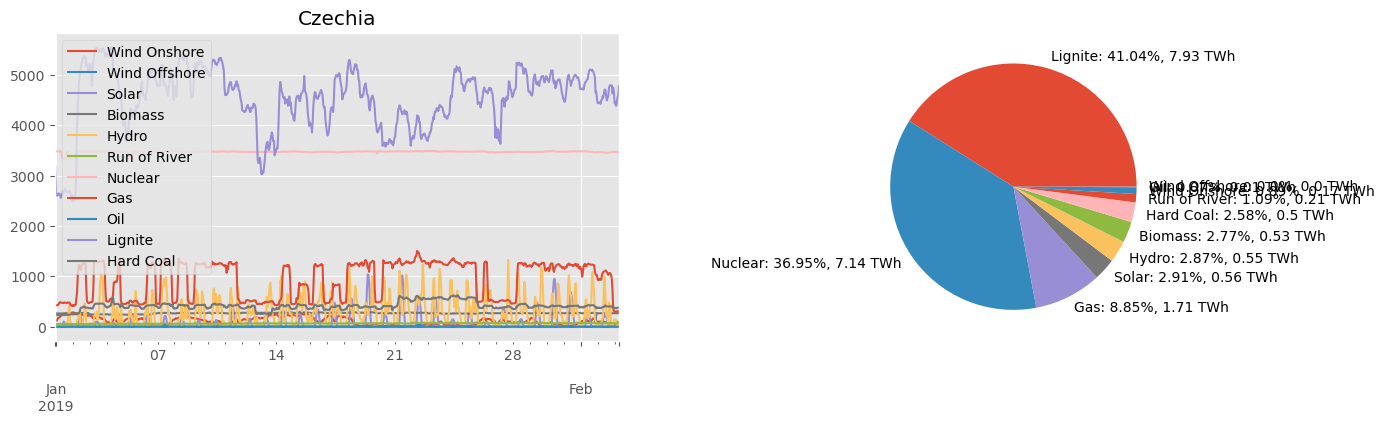

Gathering techs from DE; 7/32


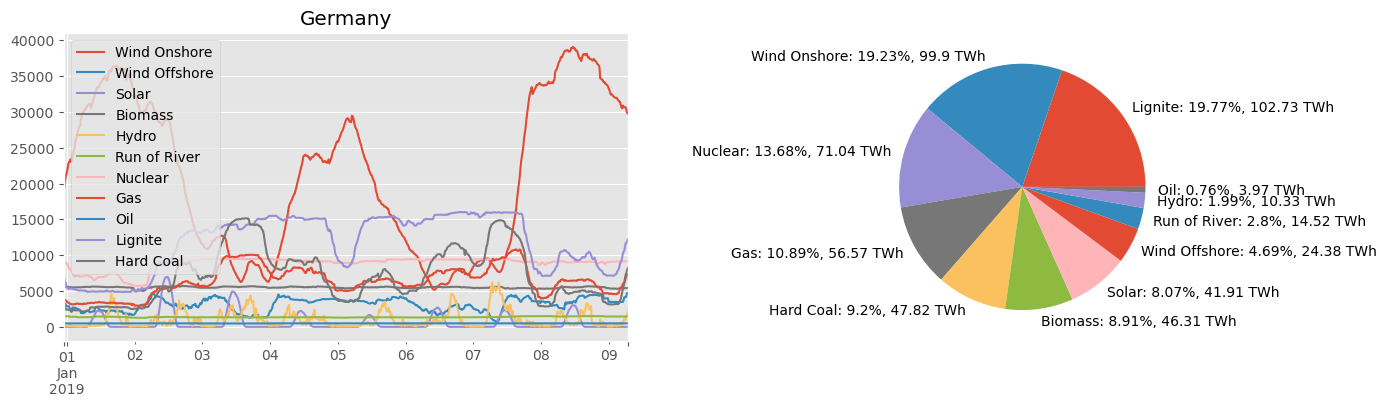

Gathering techs from DK; 8/32


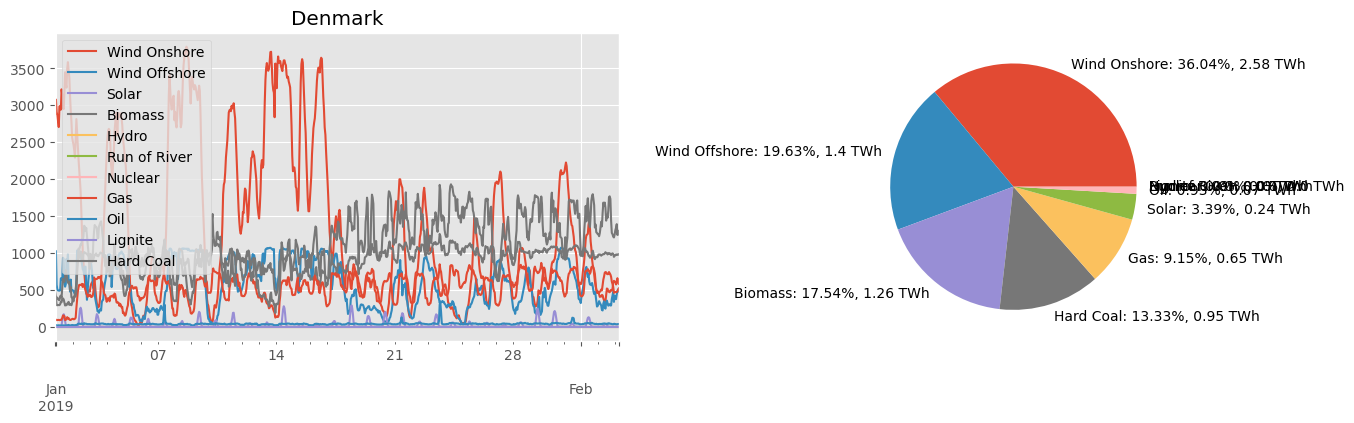

Gathering techs from EE; 9/32


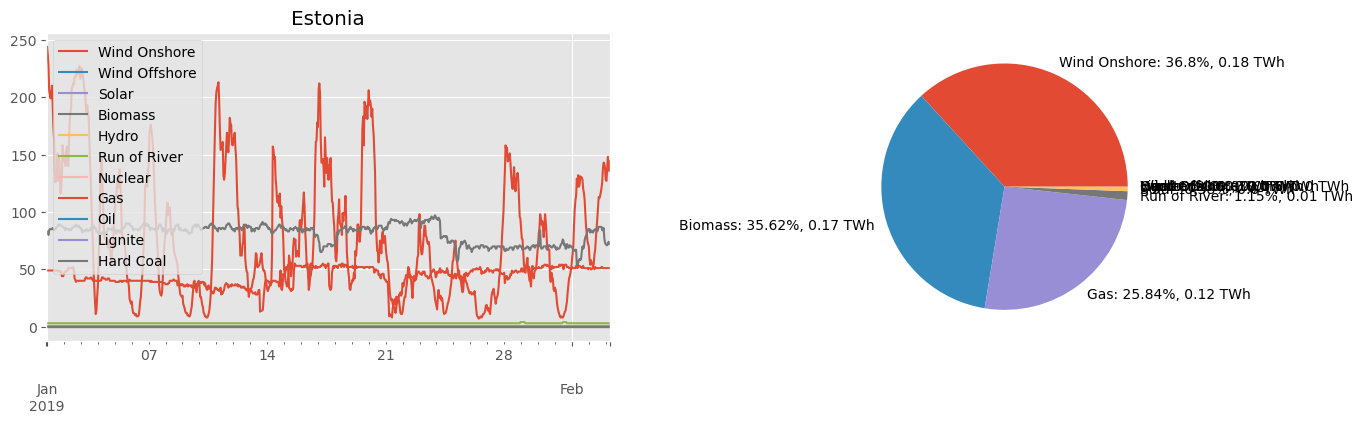

Gathering techs from ES; 10/32


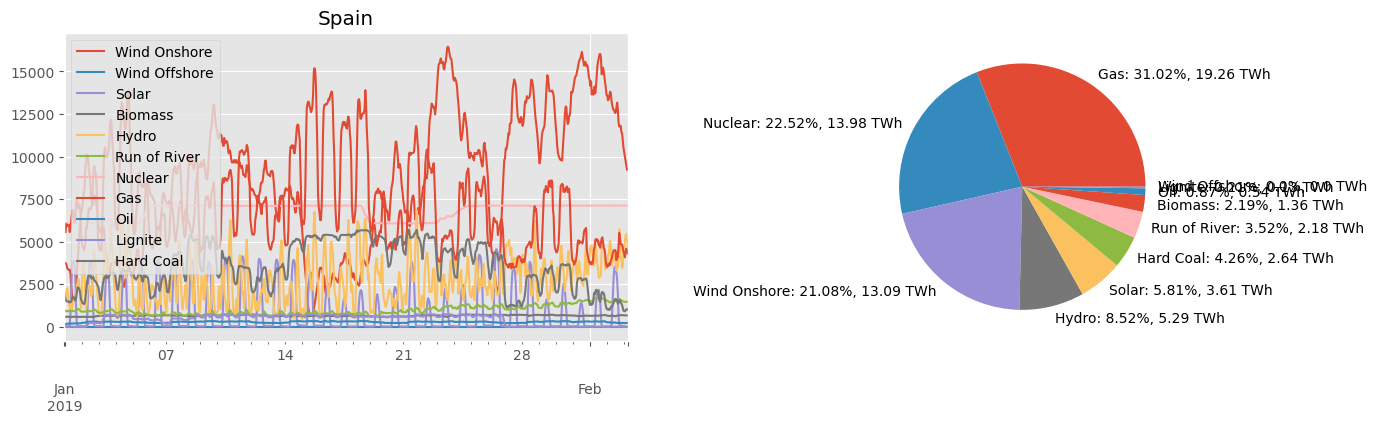

Gathering techs from FI; 11/32


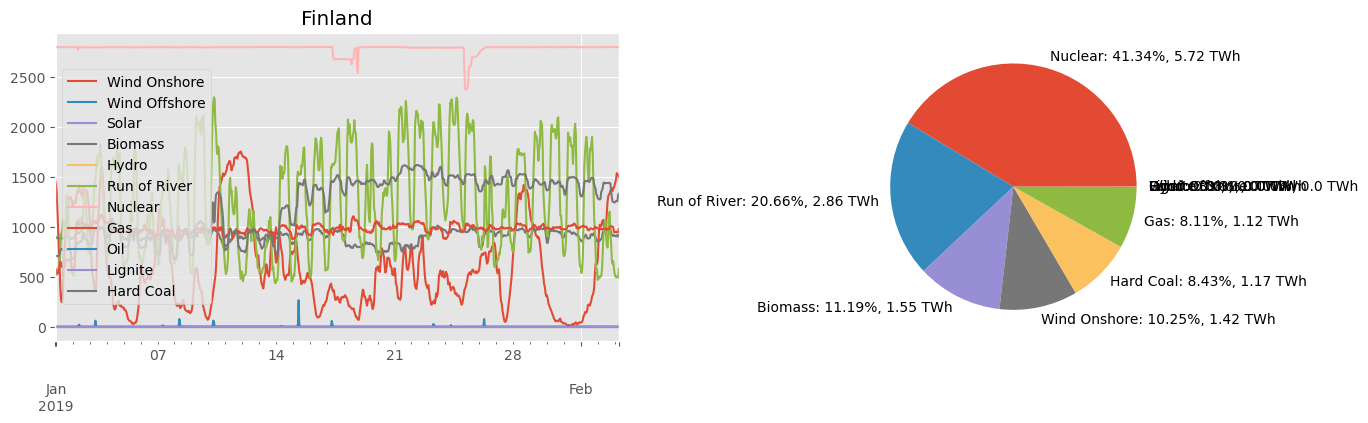

Gathering techs from FR; 12/32


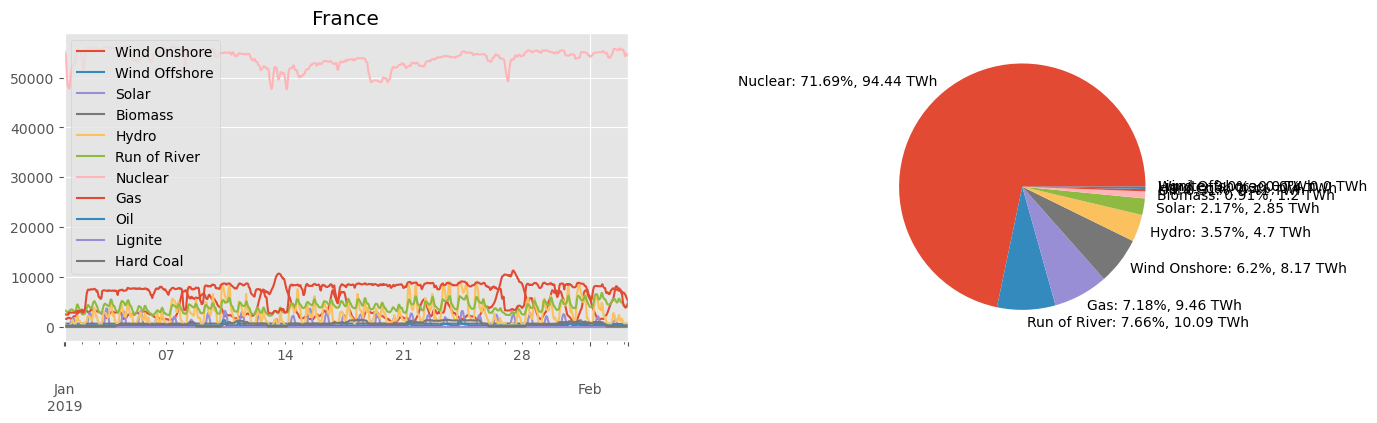

Gathering techs from GB; 13/32


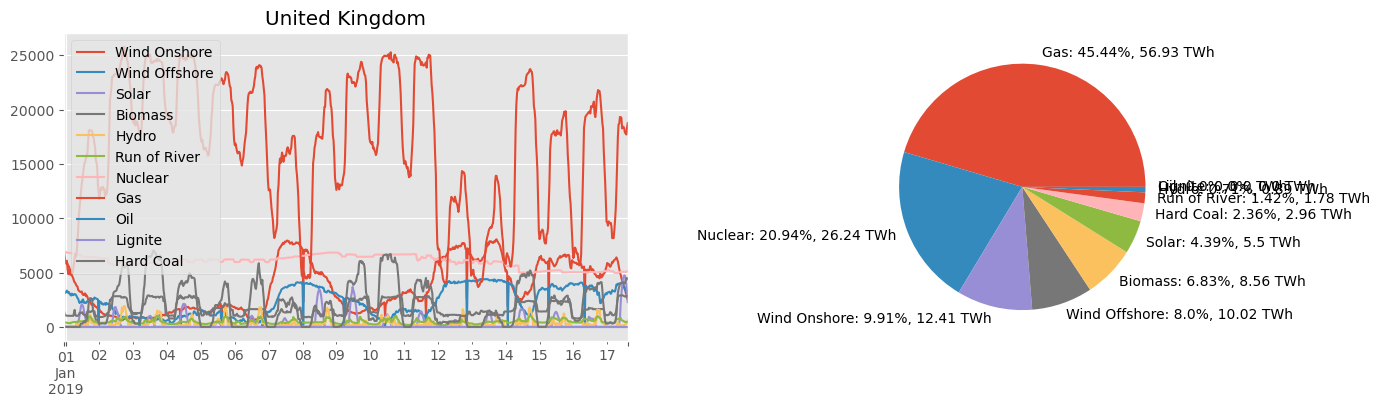

Gathering techs from GR; 14/32


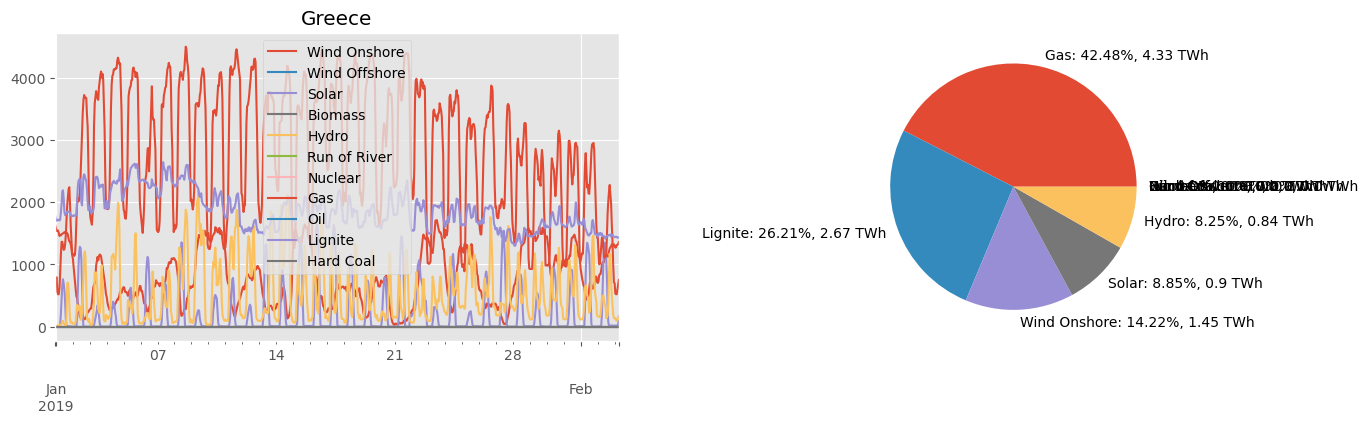

Gathering techs from HR; 15/32


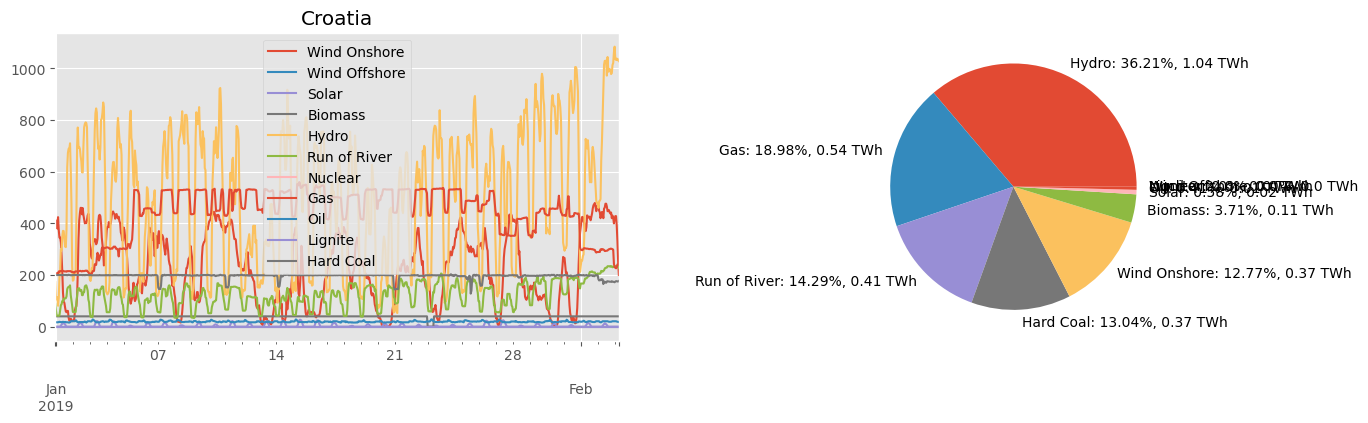

Gathering techs from HU; 16/32


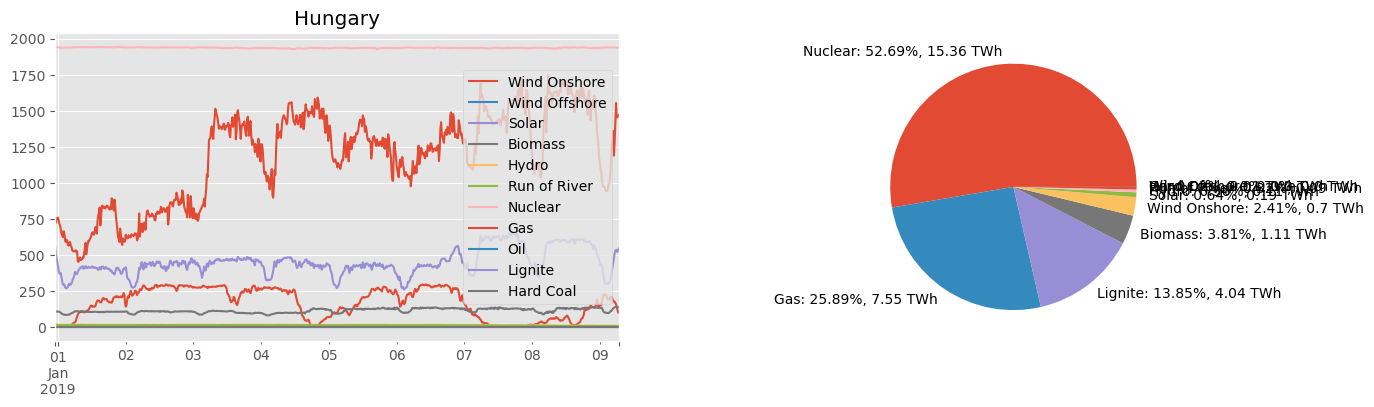

Gathering techs from IE; 17/32


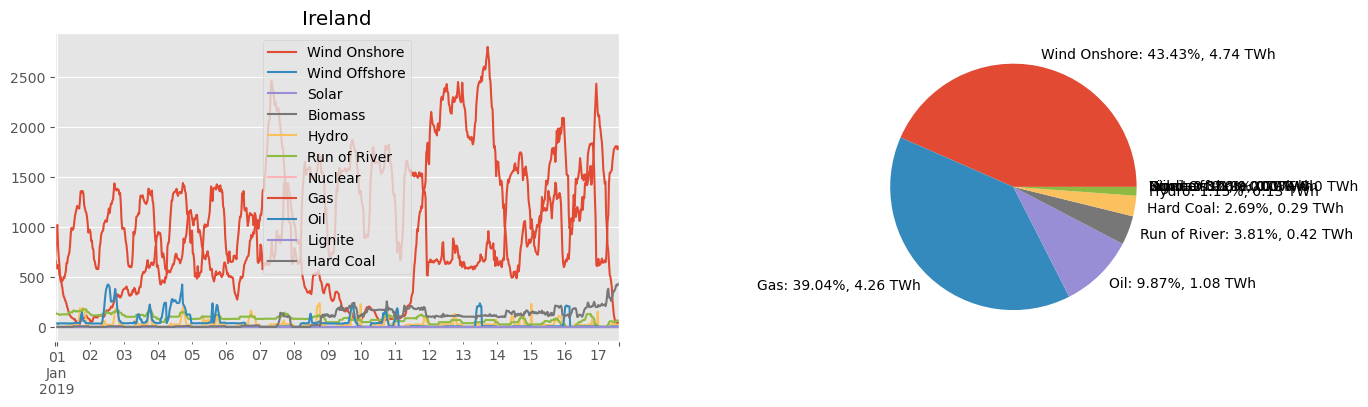

Gathering techs from IT; 18/32


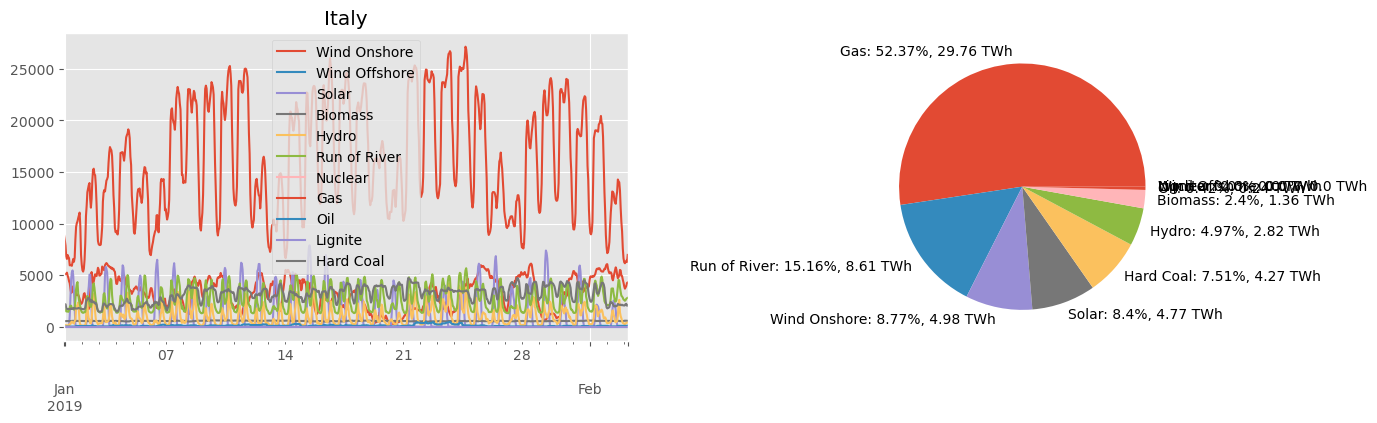

Gathering techs from LT; 19/32


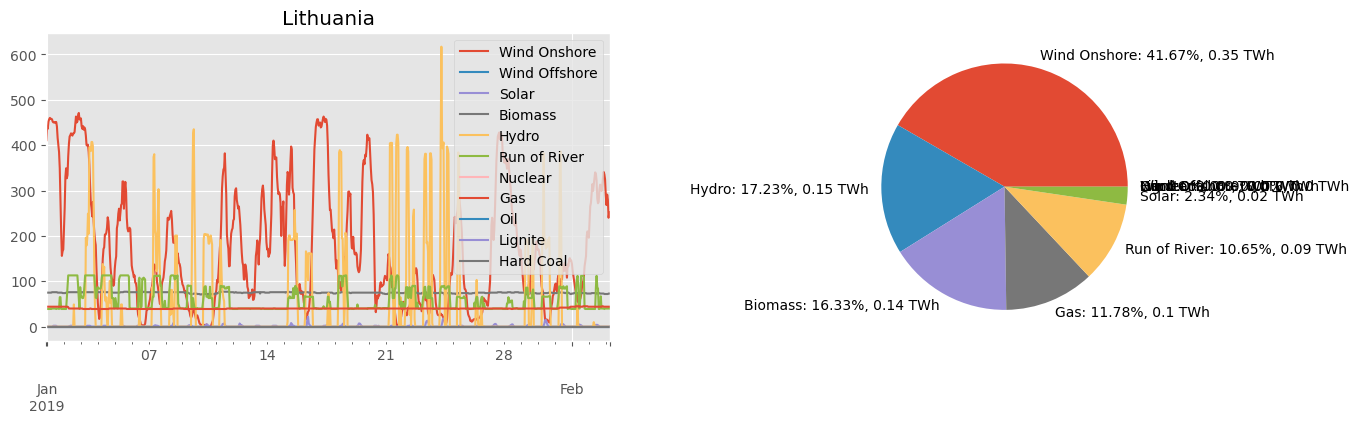

Gathering techs from LU; 20/32


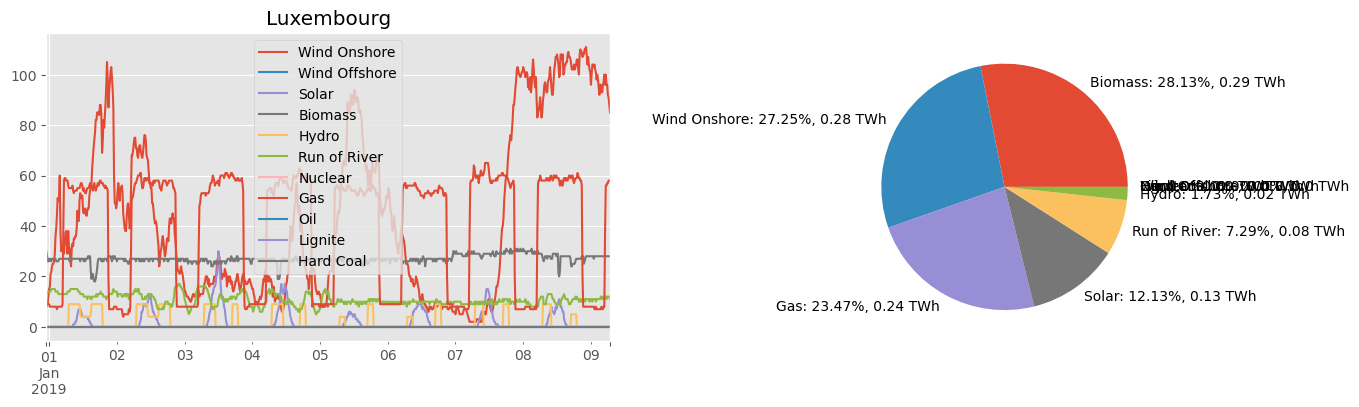

Gathering techs from LV; 21/32


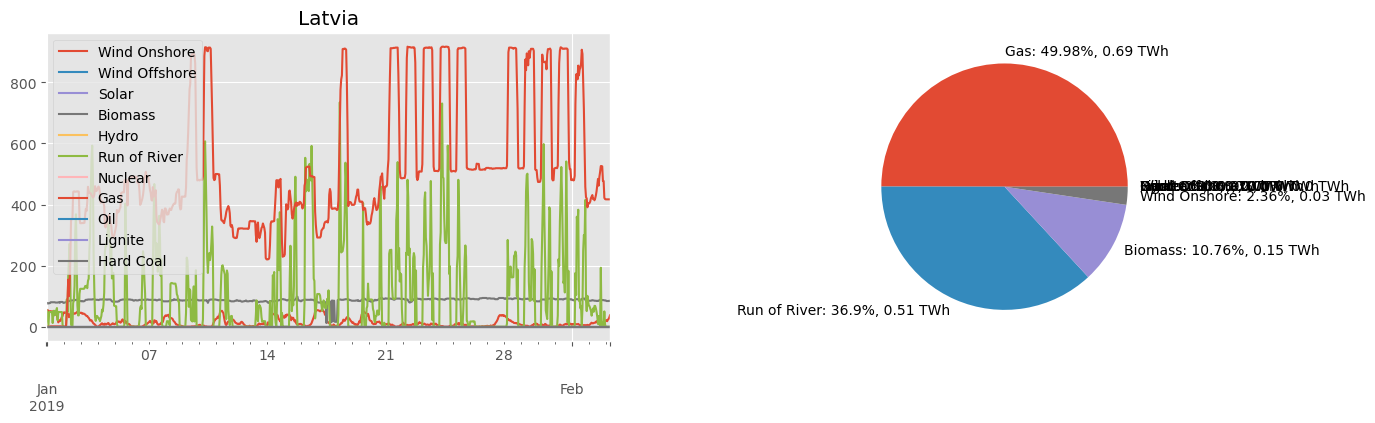

Gathering techs from ME; 22/32


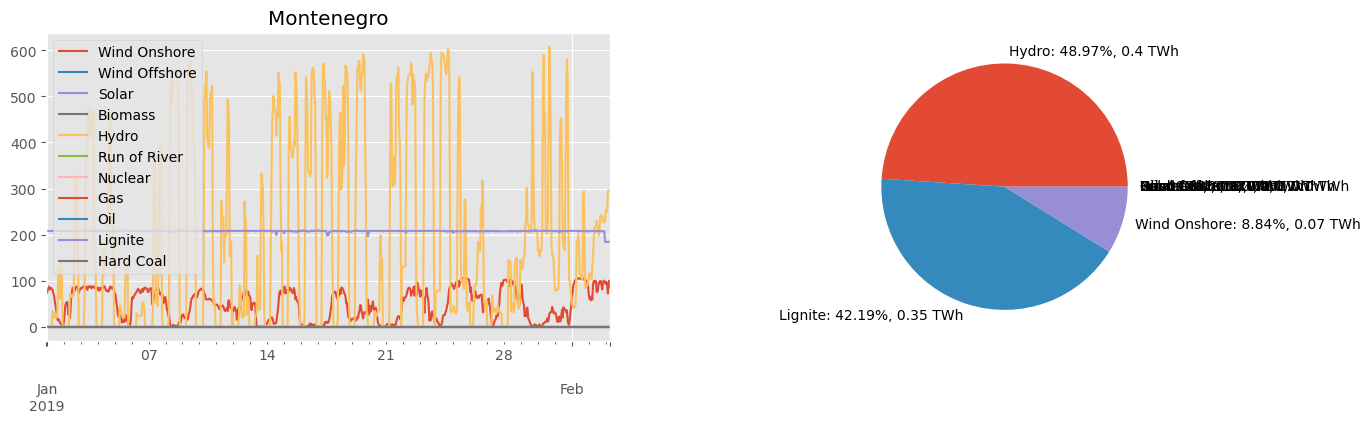

Gathering techs from MK; 23/32


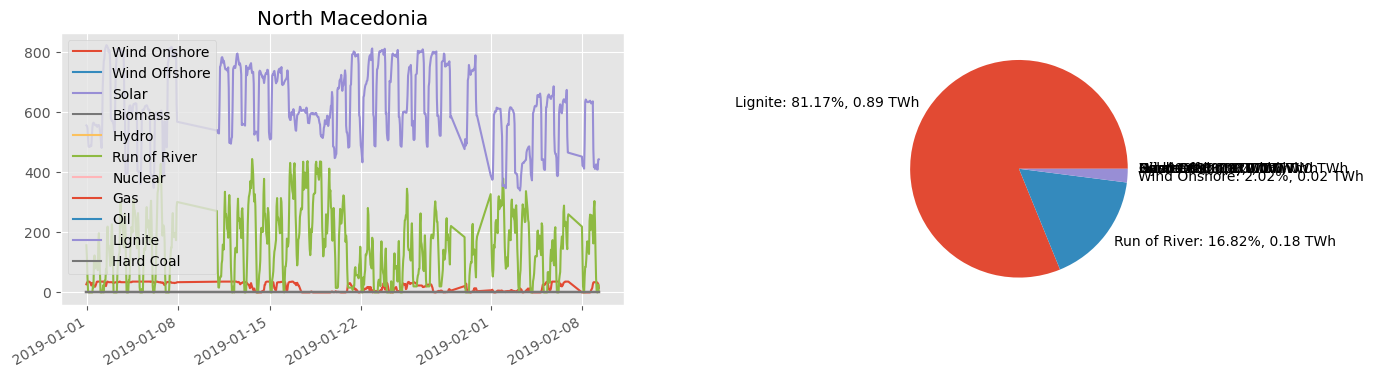

Gathering techs from NL; 24/32


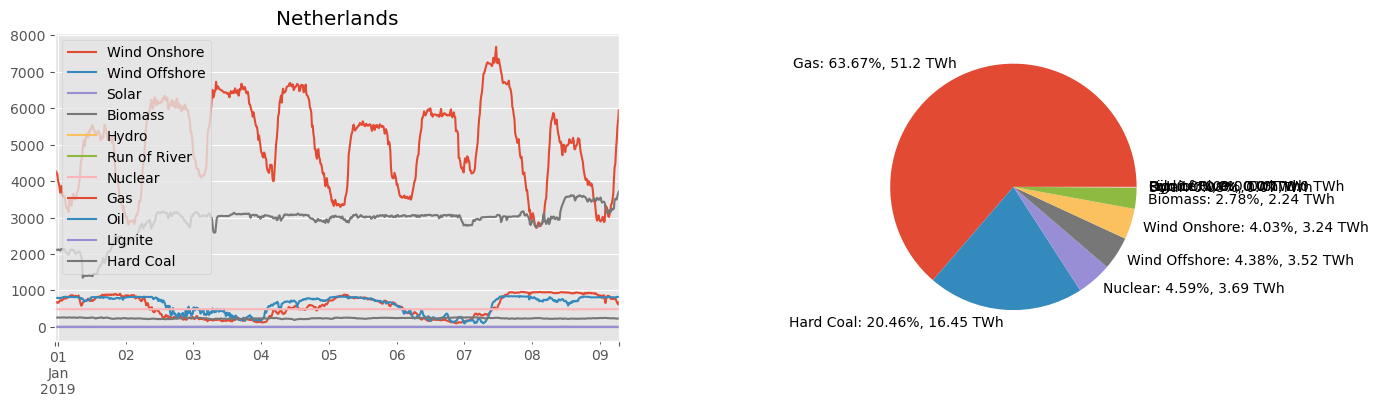

Gathering techs from NO; 25/32


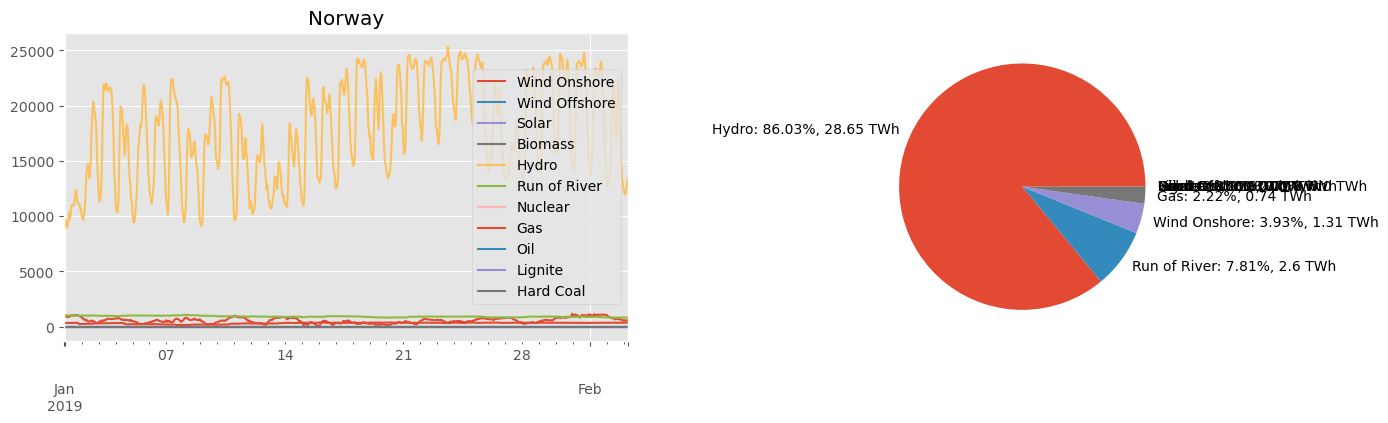

Gathering techs from PL; 26/32


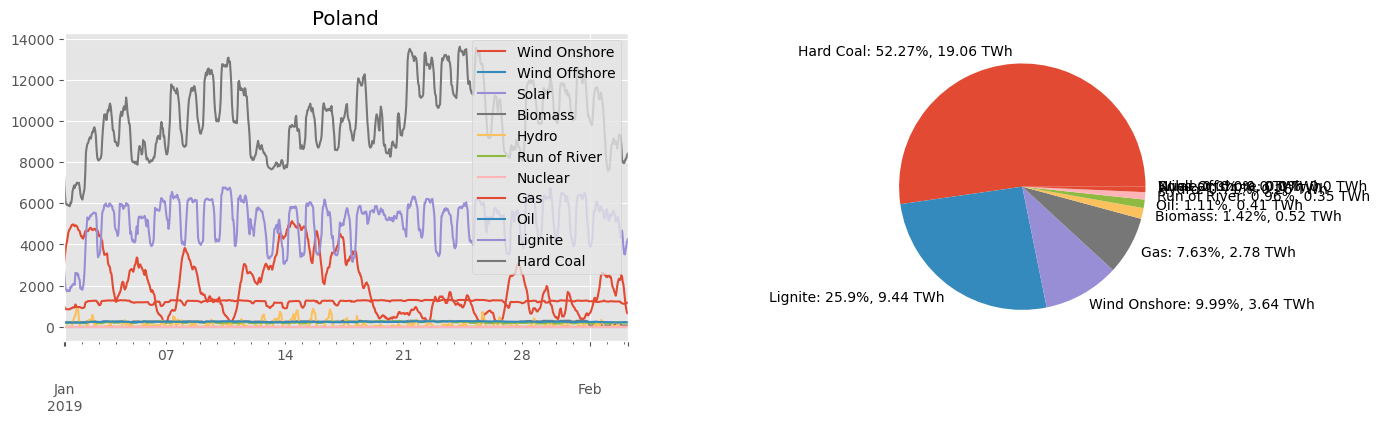

Gathering techs from PT; 27/32


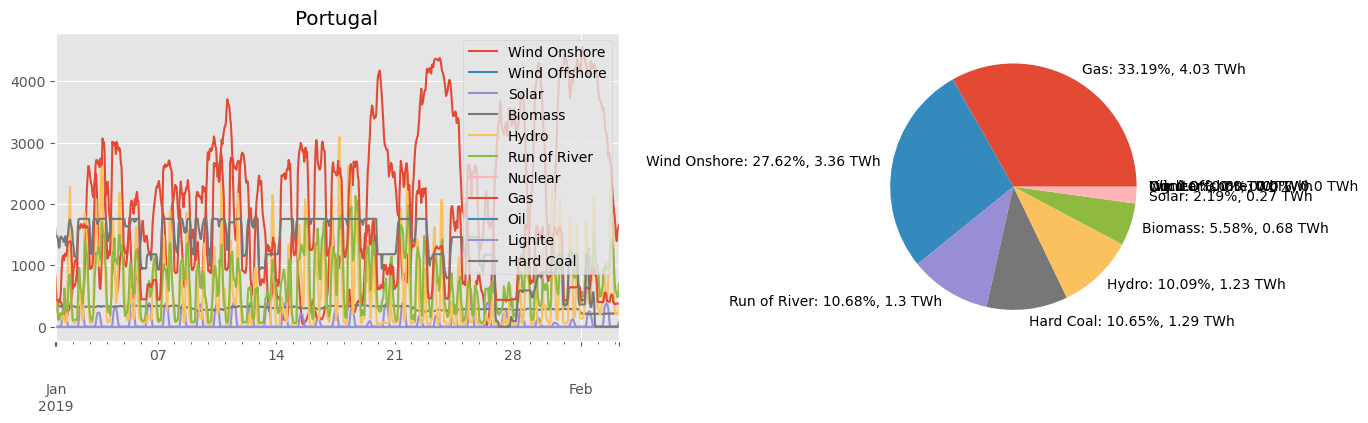

Gathering techs from RO; 28/32


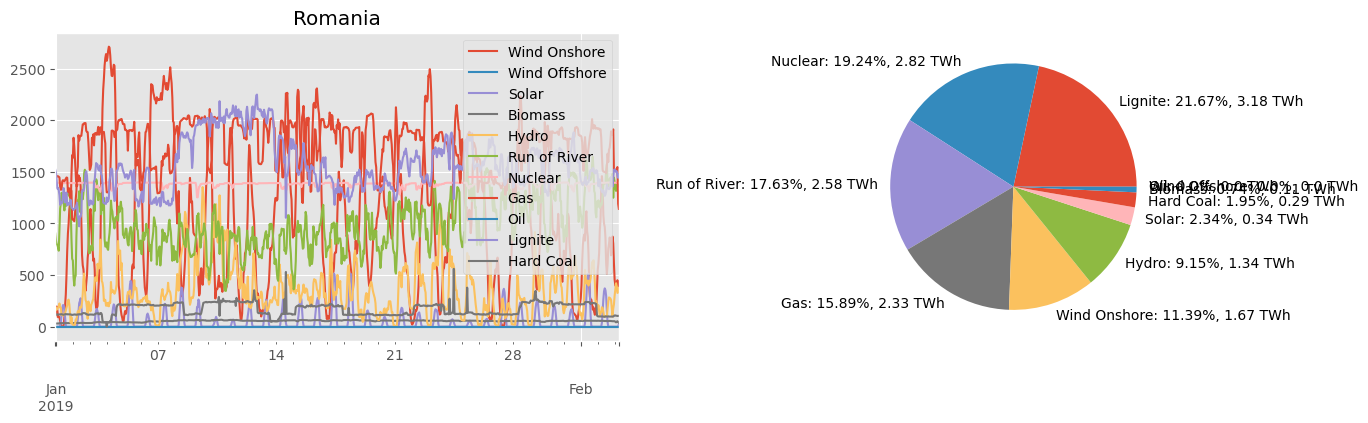

Gathering techs from RS; 29/32


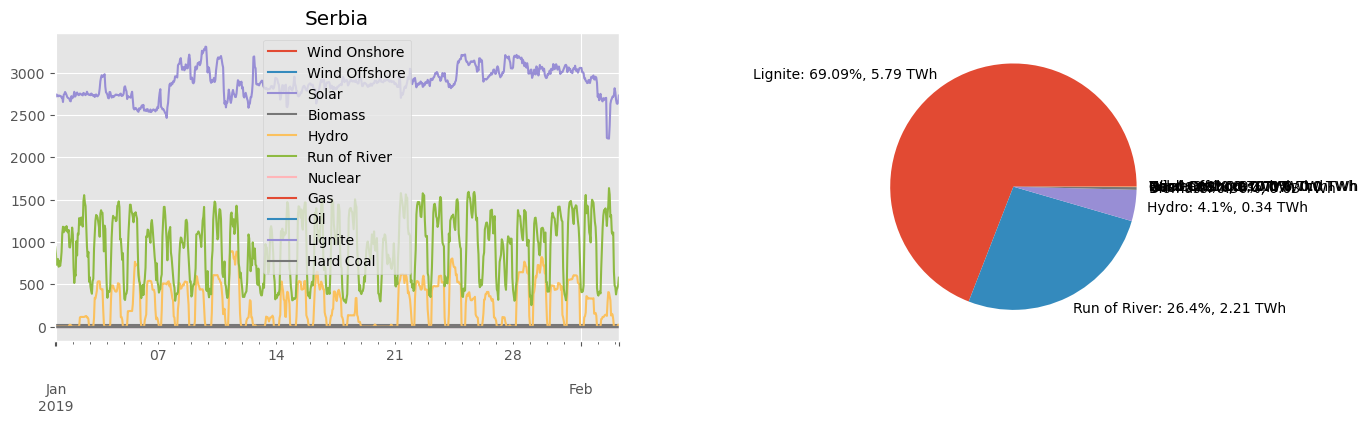

Gathering techs from SE; 30/32


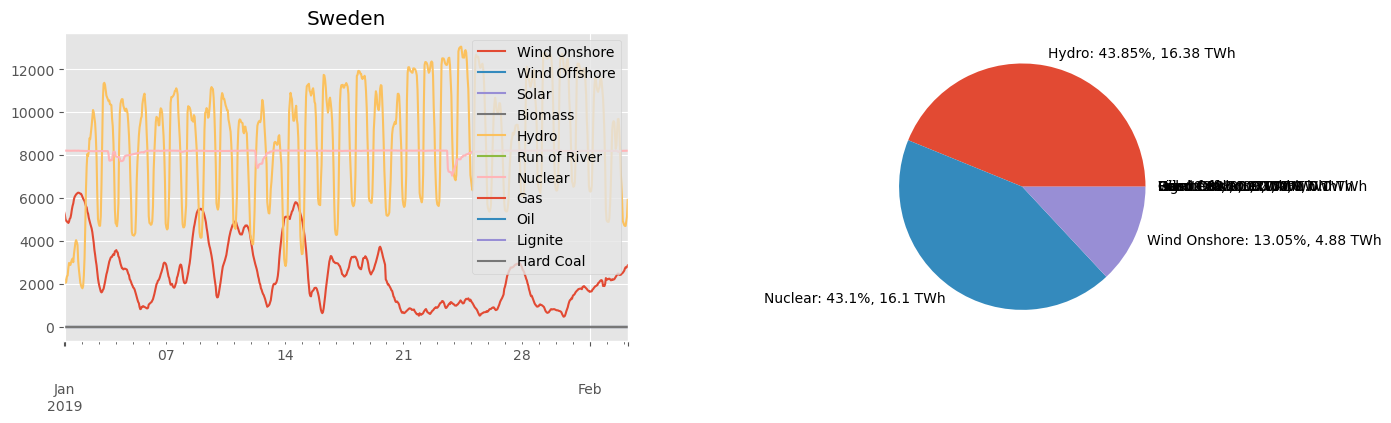

Gathering techs from SI; 31/32


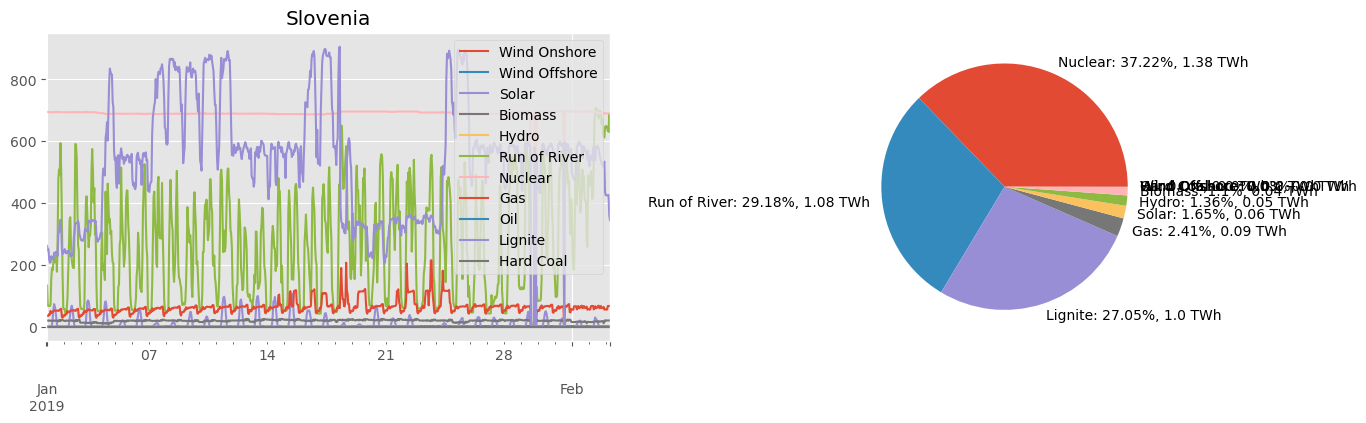

Gathering techs from SK; 32/32


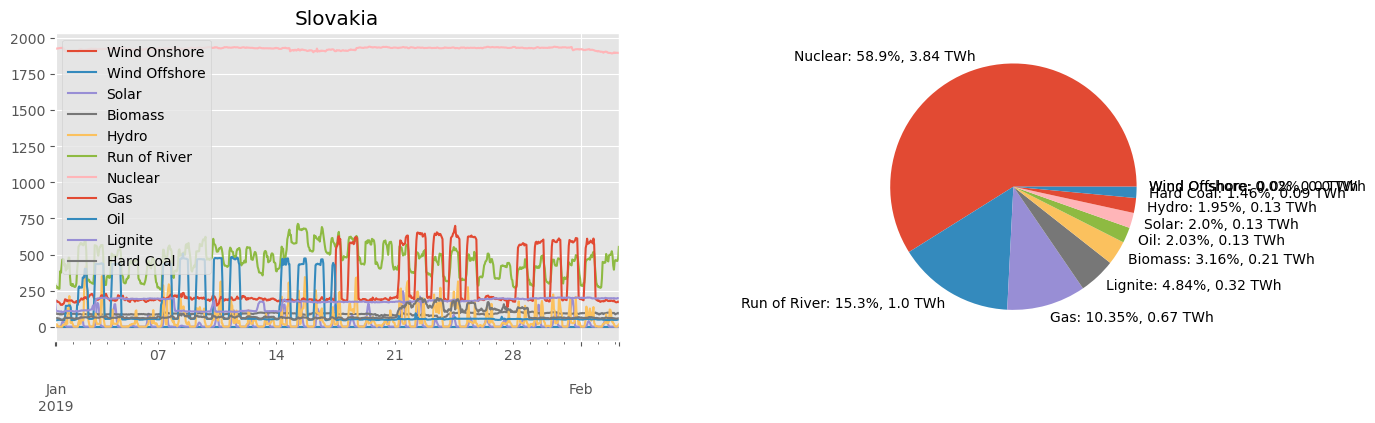

In [137]:
import matplotlib.pyplot as plt
import pycountry
plt.style.use("ggplot")

import os
from pathlib import Path
from pprint import pprint
import pandas as pd
import numpy as np
import json
import warnings
import datetime

warnings.filterwarnings("ignore")

def intersection(a, b):
    return [entry for entry in list(set(b)) if entry in a]


def harmonise_data(freq="h", quiet=True):

    data_path = Path.cwd() / ".." / ".." / "generation_data"
    target_path = Path.cwd() / ".." / ".." / "harmonised_generation_data"

    with open(data_path / "generation_mapper_entsoe.json", "r") as f:
        mapper_to_entsoe = json.load(f)
    pprint(mapper_to_entsoe)
    
    def is_country_generation(filename):
        return filename.endswith(".csv") and len(filename) == 6 

    generation_files = [file for file in os.listdir(data_path) if is_country_generation(file)]
    # generation_files = ["DE.csv"]

    for i, gen in enumerate(generation_files):
        print(f"Gathering techs from {gen[:2]}; {i+1}/{len(generation_files)}")

        gen = pd.read_csv(data_path / gen, parse_dates=True, index_col=0)

        if not isinstance(gen.index[0], datetime.datetime):
            gen = (
                gen.iloc[1:]
                .fillna(0)
                .astype(np.float)
            )

        def make_tz_time(time):
            return pd.Timestamp(time).tz_convert("utc")

        gen.index = pd.Series(gen.index).apply(lambda time: make_tz_time(time))

        clean_generation = pd.DataFrame(index=gen.index)

        taken_generators = list()
        for generator, entsoe_names in mapper_to_entsoe.items():
            
            inter = intersection(entsoe_names, gen.columns)
            taken_generators += inter
            if len(inter) > 0:
                clean_generation[generator] = gen[inter].sum(axis=1)
            else:
                clean_generation[generator] = np.zeros(gen.shape[0])

        if not quiet:

            fig, ax = plt.subplots(1, 2, figsize=(16, 4))
        
            clean_generation.iloc[:800].plot(ax=ax[0]) 

            totals = clean_generation.sum(axis=0).sort_values(ascending=False)
            
            shares = totals/totals.sum()
            ax[1].pie(totals.values, labels=
                    [f"{name}: {np.around(share*100, decimals=2)}%, {np.around(value/4*1e-6, decimals=2)} TWh" 
                    for name, share, value in zip(totals.index, shares.tolist(), totals.values)])
            ax[0].set_title(pycountry.countries.get(alpha_2=generation_files[i][:2].upper()).name)                   

            plt.show()
        
        clean_generation = clean_generation.resample(freq).mean()
        clean_generation.columns = [col + " (MWh)" for col in clean_generation.columns]
        clean_generation.to_csv(target_path / ("prepared_"+generation_files[i]))

    # return gen, clean_generation, taken_generators


# gen, proc, taken = harmonise_data()
harmonise_data(quiet=False)

In [130]:
print(proc.sum().sum() / gen.sum().sum())

print(proc.sum().sort_values(ascending=False).round(decimals=3)*100 / proc.sum().sum())

0.9686603685131582
Lignite          19.774918
Wind Onshore     19.230427
Nuclear          13.675373
Gas              10.890353
Hard Coal         9.204278
Biomass           8.914065
Solar             8.068449
Wind Offshore     4.693769
Run of River      2.795068
Hydro             1.988677
Oil               0.764622
dtype: float64


In [131]:
gen.drop(columns=taken).sum().sort_values(ascending=False)

Hydro Pumped Storage.1     48020719.0
Other                      13313522.0
Other renewable             5132293.0
Geothermal                   725222.0
Fossil Gas.1                  25022.0
Nuclear.1                     12141.0
Fossil Oil.1                    488.0
Hydro Water Reservoir.1          11.0
dtype: float64

In [ ]:
def make_tz_time(time):
    return pd.Timestamp(time).tz_convert("utc")
# type(pd.Timestamp(gen.index[4]).tz_convert("utc"))

index = pd.Series(gen.index).apply(lambda time: make_tz_time(time))

#gen.index[4].tz_convert("utc")

print(index[:10])
print(pd.DatetimeIndex(index))


0   2018-12-31 23:00:00+00:00
1   2018-12-31 23:15:00+00:00
2   2018-12-31 23:30:00+00:00
3   2018-12-31 23:45:00+00:00
4   2019-01-01 00:00:00+00:00
5   2019-01-01 00:15:00+00:00
6   2019-01-01 00:30:00+00:00
7   2019-01-01 00:45:00+00:00
8   2019-01-01 01:00:00+00:00
9   2019-01-01 01:15:00+00:00
dtype: datetime64[ns, UTC]
DatetimeIndex(['2018-12-31 23:00:00+00:00', '2018-12-31 23:15:00+00:00',
               '2018-12-31 23:30:00+00:00', '2018-12-31 23:45:00+00:00',
               '2019-01-01 00:00:00+00:00', '2019-01-01 00:15:00+00:00',
               '2019-01-01 00:30:00+00:00', '2019-01-01 00:45:00+00:00',
               '2019-01-01 01:00:00+00:00', '2019-01-01 01:15:00+00:00',
               ...
               '2019-12-31 20:30:00+00:00', '2019-12-31 20:45:00+00:00',
               '2019-12-31 21:00:00+00:00', '2019-12-31 21:15:00+00:00',
               '2019-12-31 21:30:00+00:00', '2019-12-31 21:45:00+00:00',
               '2019-12-31 22:00:00+00:00', '2019-12-31 22:15:00+00:00

##### Day-Ahead Prices 

In [143]:
from entsoe import EntsoePandasClient
from entsoe.exceptions import NoMatchingDataError
import pandas as pd
from pathlib import Path
import os

Path.cwd()
os.listdir()

api_key = "b45ffb86-fea3-49e7-9c01-9ad6429d3ec9"
client = EntsoePandasClient(api_key=api_key)

start = pd.Timestamp('20190101', tz='Europe/Brussels')
end = pd.Timestamp('20200101', tz='Europe/Brussels')

countries = ['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK']

for country in countries:
    print(f"Trying country {country}.")

    country_code = country

    try:
        day_ahead_prices_country = client.query_day_ahead_prices(country_code, start=start, end=end)
    except NoMatchingDataError:
        continue

    day_ahead_prices_country.to_csv(Path.cwd() / ".." / ".." / "price_data" / f"{country}.csv")

#generation = pd.concat(generation, keys=countries, axis=1)
#client.query_crossborder_flows(country_code_from, country_code_to, start, end)

Trying country AL.
Trying country AT.
Trying country BA.
Trying country BE.
Trying country BG.
Trying country CH.
Trying country CZ.
Trying country DE.
Trying country DK.
Trying country EE.
Trying country ES.
Trying country FI.
Trying country FR.
Trying country GB.
Trying country GR.
Trying country HR.
Trying country HU.
Trying country IE.
Trying country IT.
Trying country LT.
Trying country LU.
Trying country LV.
Trying country ME.
Trying country MK.
Trying country NL.
Trying country NO.
Trying country PL.
Trying country PT.
Trying country RO.
Trying country RS.
Trying country SE.
Trying country SI.
Trying country SK.


PING google.com (172.217.19.78) 56(84) bytes of data.
64 bytes from ham02s17-in-f14.1e100.net (172.217.19.78): icmp_seq=1 ttl=118 time=13.2 ms
64 bytes from ham02s17-in-f14.1e100.net (172.217.19.78): icmp_seq=2 ttl=118 time=12.9 ms
64 bytes from ham02s17-in-f14.1e100.net (172.217.19.78): icmp_seq=3 ttl=118 time=12.0 ms
^C

--- google.com ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2003ms
rtt min/avg/max/mdev = 12.006/12.685/13.189/0.498 ms
